## Prediction using Un supervised ML
## Using K-Means clustering
### In this project we cluster iris data based on sepal length, sepal width, petal length and petal width


## 1. Import main libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 2. Explore data

In [2]:
# Read and print first 5 rwos
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Drop Id column
iris_df.drop('Id', axis=1, inplace =True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#print summary statics
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
#check null values
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#Drop Species feature and using other features to train
X = iris_df.drop('Species',axis=1)

## Data visualization

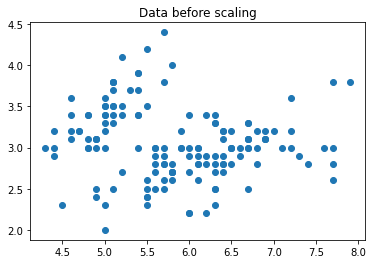

In [10]:
plt.scatter(np.array(X)[:,0],np.array(X)[:,1])
plt.title('Data before scaling')
plt.show()

## 3. Preprocessing the data
###     - Scale data

In [11]:
#Scale features using noramlize 
#noramlize equation (x - min(x)) / (max(x) - min(x))
from sklearn.preprocessing import normalize
scaled_data = normalize(X)
scaled_data

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

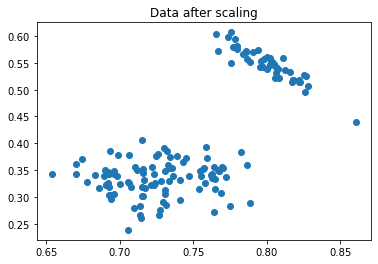

In [12]:
plt.scatter(scaled_data[:,0],scaled_data[:,1])
plt.title('Data after scaling')
plt.show()

## 4. Fitting K-Means model to the train set

In [13]:
#Import K-Means library
from sklearn.cluster import KMeans
ks= range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertias.append(model.inertia_)

### visualize Elbow method to choose best number of clusters

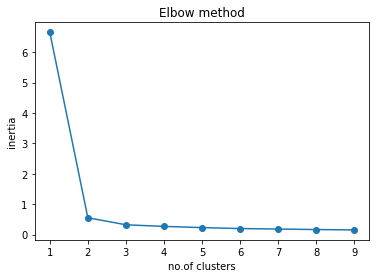

In [14]:
plt.plot(ks, inertias, '-o')
plt.title('Elbow method')
plt.xlabel('no.of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#### As we can see from above graph the best number of clusters is 3

## Train model with 3 clusters

In [15]:
model = KMeans(n_clusters = 3)
model.fit(scaled_data)
labels = model.predict(scaled_data)
centers = model.cluster_centers_

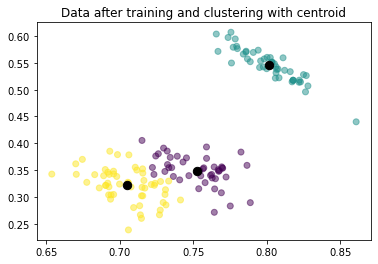

In [16]:
df = pd.DataFrame({'Labels': labels,"Species":iris_df['Species']})
xs = scaled_data[:,0]
ys = scaled_data[:,1]
plt.scatter(xs, ys, c=df['Labels'],alpha=.5)
plt.scatter(centers[:,0],centers[:,1],c='black',alpha=1,s=70)
plt.title("Data after training and clustering with centroid")

plt.show()

In [17]:
ct = pd.crosstab(df['Labels'], df['Species'])
ct

Species,Iris-setosa,Iris-versicolor,Iris-virginica
Labels,,,
0,0,45,0
1,50,0,0
2,0,5,50


## As we see above model predicted 145 correctly from 150 